<a id='top'></a>



<a id='top'></a>


# CSCI3022 S23


# Homework 10: Bootstrapping and Intro to SLR
## Due Monday, April 24th at 11:59pm to Gradescope
***

**Name**: _____Owen Kutzscher
***

***
### Collaboration Policy

While completing the assignment you are not allowed to consult any source other than the course textbooks/online reference links provided on Canvas, your own class notes, and/or the posted lecture slides/in-class Jupyter notebooks.   You may discuss questions you have with your classmates or on Piazza or in office hours, but all work you submit must be your own, which means when writing up your solutions or code, you MUST do it entirely by yourself. 

You should be able to easily reproduce from scratch and explain a solution that was your own when asked in office hours by a TA/Instructor or on a quiz/exam without referencing your notes/book/HW.   


**Do not search/ask for a solution online**: You may not actively search for a solution to the problems below from the internet. This includes posting to or using sources like ChatGPT, StackOverflow, StackExchange, Reddit, Chegg, CourseHero, etc.  

**We are here to help!  Visit HW Hours and/or post questions on Piazza!**


Copying/consulting from the solution of another classmate or an online solution (or providing a classmate your solution) constitutes a **violation of the course's collaboration policy and the honor code and will result in an F in the course and a trip to the honor council**.   






### Instructions for Submitting in Correct Format 

You must submit a PDF of this Juptyer notebook to Gradescope by the deadline listed above.  Submissions that are not a PDF or that are not submitted to Gradescope will not be counted for credit.  

$\color{red}{\text{Before submitting your PDF, make sure that your LaTeX has rendered correctly in your PDF.}}$
$\color{red}{\text{Any of your solutions with incorrectly rendered or incompletely rendered LaTeX will be given 0 points.}}$ 

- There are several ways to quickly make a .pdf out of this notebook for Gradescope submission.  
 
 - If you are running Juptyer locally on your computer: 
 
     - Option1 : Select Kernel->Restart & Run All.  Then select File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"
 
     - Option 2: Select Kernel->Restart & Run All.   Then select File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 
 - If you are running using CSEL: 
 
     - Option1 :  Go to File ->Save & Export Notebook As-> HTML.  Then open the HTML, and then Right-Click -> Print and select "Print to PDF".  
     - Option2 :  Go to File ->Download. Then use this converter https://htmtopdf.herokuapp.com/ipynbviewer/ to convert ipynb to pdf.
 
### Notes
- For full points you must correctly match your questions to the respective Gradescope problem, and include clear comments in your code.   Please note that any LaTeX that is not correctly rendered in your submitted PDF will result in a 0 on the entire problem(s) that involves the unrendered LaTeX. 
- You **must show all work and justify ALL answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Any relevant data sets are available on Canvas. 
- LaTeX Tips:  Here is a [reference guide] (https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference).  **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 

- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.




We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
from patsy import dmatrices
%matplotlib inline


---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) |[Problem 3](#p3) 
---


<br>

---
<a/ id='p1'></a>

### [4 points] Problem 1  - Scientists vs. P-Values 
***

Read the following article from **FiveThirtyEight**: [Statisticians Found One Thing They Can Agree On: It's Time to Stop Misusing P-Values](http://fivethirtyeight.com/features/statisticians-found-one-thing-they-can-agree-on-its-time-to-stop-misusing-p-values/). Then answer the following questions:  

Based on the article:

a).  In what ways are scientists misusing p-values?  

Scientists are misusing p values in many ways. One way is that they have different definitions of interpreting what the p value is. Some use it to mean one thing, while others use it to mean something else. This comes back to a Baesian vs frequentist view. Also the p value can be searched for or aquired, given enough testing and enough data. This makes it so that individuals can create nearly non replecable studies where they can get results which look signifigant. Lastly, there just seems to be too much importance on the p-value and not enougth importance on other evidence, may scientists just say it has a p value less than 0.05 and call it an accurate study.


b).  What suggestions are being made to use them properly? 

One way is coming up with an easy to understand definition, for this we can simply say its the probablitity your data is correct given your hypothesis. (I disagree lmaoooo). But more generally, we can say that p-values should not be treated as the end all for measureing if data/a study overall is accurate.

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## (22 pts) Problem 2  (Confidence Intervals & Bootstrapping)

Consider the `hubble.csv` sample data set we used in nb09. (A description of the variables can be obtained from page 73 of https://cran.r-project.org/web/packages/gamair/gamair.pdf.) 

We're interested in using this sample data to calculate the mean distance from a galaxy to Earth in Mega parsecs (column `x` of the data).

Load the data into a dataframe:



In [2]:
dfGalaxy = pd.read_csv('hubble.csv')
dfGalaxy.head()

,Galaxy,y,x
0,NGC0300,133,2.00
1,NGC0925,664,9.16
2,NGC1326A,1794,16.14
3,NGC1365,1594,17.95
4,NGC1425,1473,21.88



**Part A**:

When creating a $t$-confidence interval when we have less than 30 data points, the theoretical assumptions require that the population distribution is approximately normally distributed.  Let's check this assumption visually:

**Part A1: (2 pts)** Make a histogram of the '$x$' data and overlay the theoretical density of the normal with mean $\bar{x}$ and sample variance $s^2$.  
 

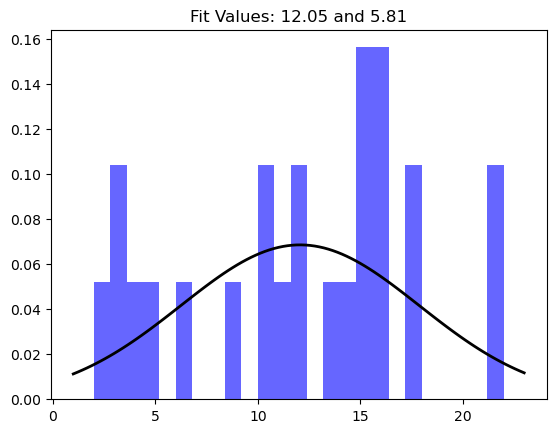

In [3]:
# dfGalaxy.hist(column='x', bins=20)



# # Generate some data for this 
# # demonstration.
# data = np.random.normal(170, 10, 250)
  
# Fit a normal distribution to
# the data:
# mean and standard deviation
mu = dfGalaxy['x'].mean()
std = dfGalaxy['x'].std()
  
# Plot the histogram.
plt.hist(dfGalaxy['x'], bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

**Part A2: (1 pt)** Make a QQ-plot of the '$x$' data compared with the quantiles of a normal distribution. 
  

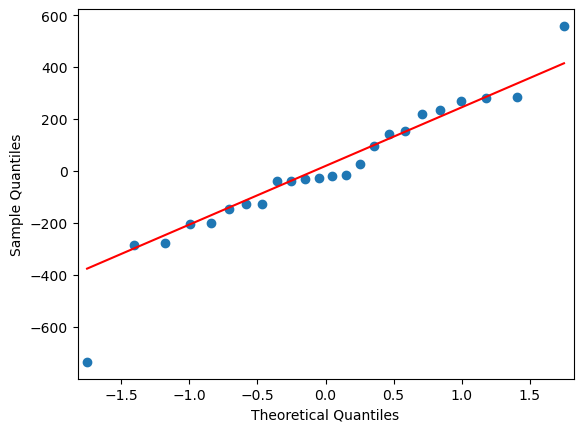

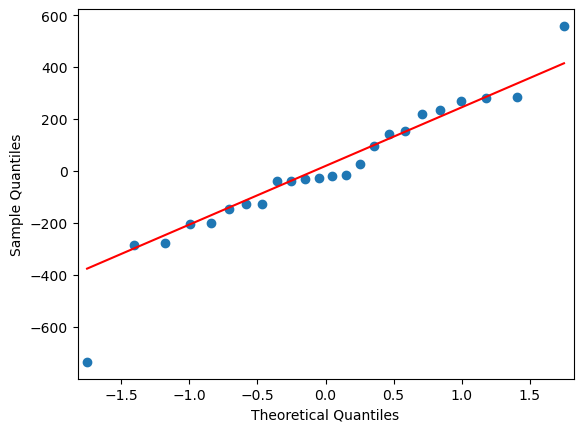

In [4]:
lmGalaxy=sm.OLS(dfGalaxy['y'], sm.add_constant(dfGalaxy['x'])).fit()





sm.qqplot(lmGalaxy.resid, line='q')

**Part A3:(1 pt)**  Based on your plots above, does this data appear approximately normally distributed or not?  Explain.
  

This does! The points appear to be roughly allong the stright line so I can say that the data is likley normally distributed

**Part B**:

Things may not look perfectly normal in part A.  Fortunately, as long as the distribution is not extremely skewed, the theoretical method is pretty robust.  To see this, let's create confidence intervals using the theory that requires normality anyway, to see how it does:   

For Part B only, assume each observation is independent and identically distributed as a normal random variable.

**Part B1 (2 pts)** Create a 95% confidence interval for the mean of a galaxy's distance from Earth in Mega parsecs from scratch using the definition of a t-confidence interval shown below (i.e. use the data to calculate each of the variables shown below, and do NOT use a built-in confidence interval method):

$$\bar{x} \pm t_{\alpha/2,n-1}\hspace{1mm}\frac{s}{\sqrt{n}} $$


In [5]:
import math

galaxyMean = dfGalaxy['x'].mean()
galaxyT = stats.t.ppf(0.975, 24)
galaxyS = dfGalaxy['x'].std()
galaxyN = len(dfGalaxy['x'])


print("The confidence interval is: [", (galaxyMean - (galaxyT*(galaxyS/math.sqrt(galaxyN)))), ", ", (galaxyMean + (galaxyT*(galaxyS/math.sqrt(galaxyN)))), " ] ")


The confidence interval is: [ 9.604921107733595 ,  14.504245558933071  ] 


**Part B2 (1 pt)** Check your answer to B1 using a built-in function to calculate t-confidence intervals.  

In [6]:
stats.t.interval(confidence=0.95, df=len(dfGalaxy['x'])-1, loc=np.mean(dfGalaxy['x']), scale=stats.sem(dfGalaxy['x'])) 


(9.599272544248016, 14.50989412241865)

**Part B3** Suppose you were only given the output of this confidence interval.  Determine whether or not you can answer the questions below, and if so, answer them.  If not, explain what additional information you'd need:

 - **Part B3i (1 pt)** Using only the confidence interval you found in part B2, can you find the sample mean $\bar{x}$ for the galaxy data?  If so, find it and then check your answer by actually computing the sample mean (you can use built-in functions).
 

Yes. Sample mean is about $(14.5 + 9.6) / 2 = 12.05$

In [7]:
# lets check...
print(galaxyMean)

12.054583333333333


 - **Part B3ii (2 pts)** Suppose want to test the hypothesis that the population mean of a galaxy's distance from Earth is $H_0: \mu_x=16$ (Mega parsecs) vs $H_A: \mu_x\neq 16$ (Mega parsecs), at the $95\%$ confidence level.   Using only the confidence interval from part B2 can you make a conclusion about your test?  What does your test conclude?
 

The data from B2 says that our confidence interval is 9.6 to 14.5

So, there is a 95% chance our true mean lies within 9.6-14.5, therefore it is very unlikley our true mean is 16, outisde that range. 
So we reject our $H_0$ and accept our alternitive, saying $H_0: \mu_x=16$


 - **Part B3iii (1 pt)** Check your answer to part (B3ii) by conducting a hypothesis test using the built-in function `scipy.stats.ttest_1samp` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html) 

 - What is the p-value?  What is the conclusion of the test using this p-value?
 

In [8]:
print(stats.ttest_1samp(dfGalaxy['x'], 16))

Ttest_1sampResult(statistic=-3.324107176189548, pvalue=0.0029535863887783795)


**Part C**:

For part C only, assume each observation is independent and identically distributed but is **not** normally distributed. In that case we can use  bootstrapping to create a 95% confidence interval for the mean of a galaxy's distance from Earth in Mega parsecs.  

**Part C1 (2 pts)** Write code for a function to take in sample data and draw $10000$ bootstrapped resamples (with replacement) from the data.   This function should: 

 - Plot a histogram of the bootstrapped sample means

 - Compute a bootstrapped confidence interval for the mean at the 95% confidence level

 - Plot the confidence interval for the mean on the histogram (see nb10 for an example)
  


array([ 9.77159375, 14.29958333])

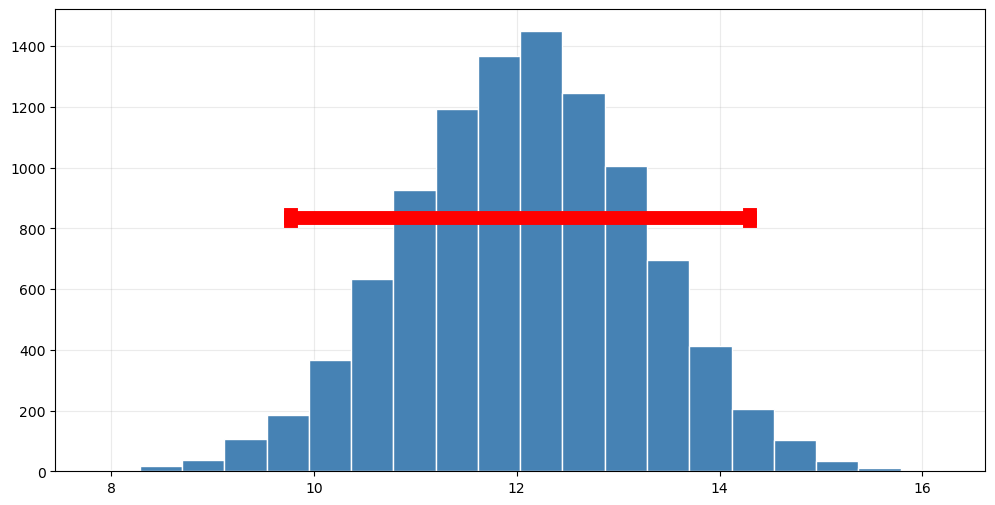

In [9]:

# lets strap on some boots and stuff
def bootstrapped_mean(sample, num_boots=10000):
    #Your Code Here
    
    
    # Create a list (or array-like object) of bootstrap resample variances
    list_of_means = []
    for ii in range(num_boots):
        resample_mean = np.random.choice(sample, size=len(sample), replace=True)
        boot_mean = np.mean(resample_mean)
        list_of_means.append(boot_mean)
    
    # Compute the 2.5 and 97.5th percentiles of the list of bootstrapped variances
    L = np.percentile(list_of_means, 2.5)
    U = np.percentile(list_of_means, 97.5)

    # Your 95% confidence interval estimate is given by these percentiles
    CI = np.array([L, U])

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(list_of_means).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=False)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=10)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="red", lw=10)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="red", lw=10)
    
    return CI 
    
        
    
    
    
    
    
    
bootstrapped_mean(dfGalaxy['x'])

***Part C2 (1 pt)***  Compare your bootstrapped CI to the theoretical CI you computed in Part B.  Are they similar or different? 

Our bootstrapped CI is 9.8 - 14.3 our theoretical CI from part B is 9.6 - 14.5

These are very similar! 

**Part D** 
Bootstrapping is useful for calculating CIs for many other population parameters (not just means).  
For each of the parameters below:
 - use bootstrapping to create the indicated confidence interval AND 
 - overlay this confidence interval on a histogram of the bootstrapped results (similar to Part C).

Your final answer to this part should include 4 different histograms and CIs (one for each parameter).  


**Part D1 (2 pts)** A $90\%$ CI for the **standard deviation** of a galaxy's distance from Earth in Mega parsecs.

array([4.4478854 , 6.57160149])

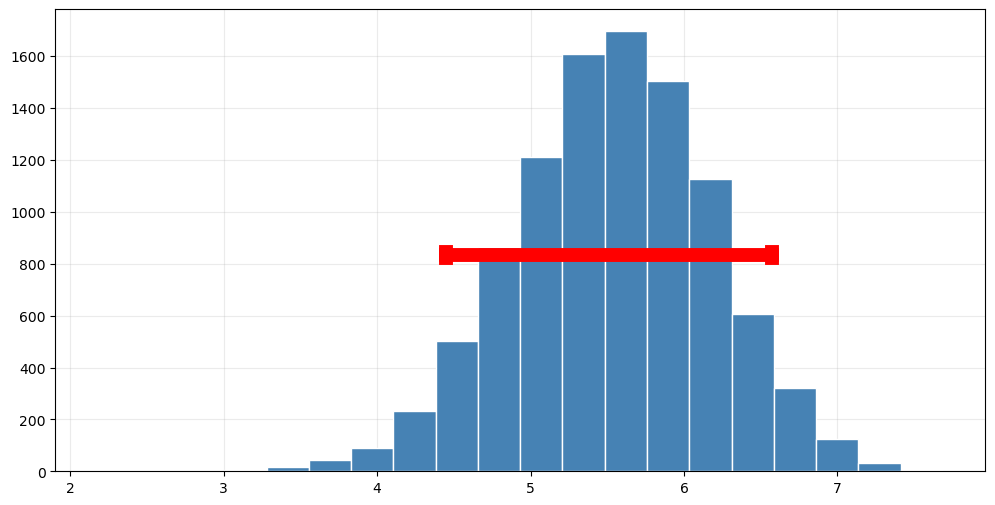

In [10]:

# lets strap on some boots and stuff
def bootstrapped_stdDev(sample, num_boots=10000):
    #Your Code Here
    
    
    # Create a list (or array-like object) of bootstrap resample variances
    list_of_stdDevs = []
    for ii in range(num_boots):
        resample_stdDev = np.random.choice(sample, size=len(sample), replace=True)
        boot_stdDev = np.std(resample_stdDev)
        list_of_stdDevs.append(boot_stdDev)
    
    # Compute the 5 and 95th percentiles of the list of bootstrapped variances
    L = np.percentile(list_of_stdDevs, 5)
    U = np.percentile(list_of_stdDevs, 95)

    # Your 95% confidence interval estimate is given by these percentiles
    CI = np.array([L, U])

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(list_of_stdDevs).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=False)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)

    
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=10)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="red", lw=10)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="red", lw=10)
    
    return CI 
    
        
    
    
    
    
    
    
bootstrapped_stdDev(dfGalaxy['x'])

**Part D2 (2 pts)** An $85\%$ CI for the **lower quartile** of a galaxy's distance from Earth in Mega parsecs.



array([ 3.63, 11.22])

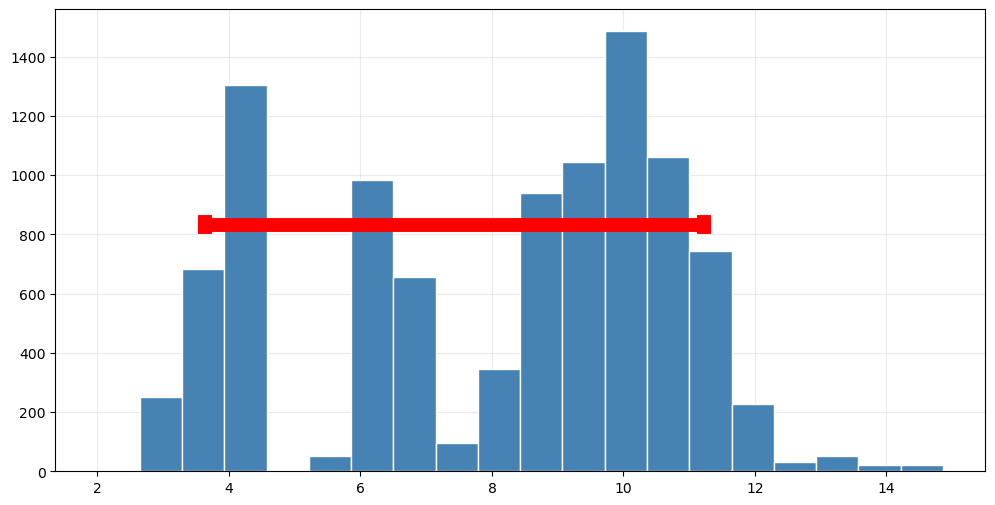

In [11]:
# lets strap on some boots and stuff
def bootstrapped_lowQuartile(sample, num_boots=10000):
    #Your Code Here
    
    
    # Create a list (or array-like object) of bootstrap resample variances
    list_of_stdDevs = []
    for ii in range(num_boots):
        resample_stdDev = np.random.choice(sample, size=len(sample), replace=True)
        boot_stdDev = np.quantile(resample_stdDev, 0.25)
        list_of_stdDevs.append(boot_stdDev)
    
    # Compute the 5 and 95th percentiles of the list of bootstrapped variances
    L = np.percentile(list_of_stdDevs, 7.5)
    U = np.percentile(list_of_stdDevs, 92.5)

    # Your 95% confidence interval estimate is given by these percentiles
    CI = np.array([L, U])

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(list_of_stdDevs).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=False)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)

    
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=10)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="red", lw=10)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="red", lw=10)
    
    return CI 
    
        
    
    
    
    
    
    




#dfGalaxyLowerQ = dfGalaxy['x'].loc[(dfGalaxy['x'] < dfGalaxy['x'].quantile(0.25))]
#print(dfGalaxy['x'].quantile(0.25))
#print(dfGalaxyLowerQ)

bootstrapped_lowQuartile(dfGalaxy['x'])

**Part D3 (2 pts)**  A $94\%$ CI for the **upper quartile** of a galaxy's distance from Earth in Mega parsecs.



array([14.1525, 17.7625])

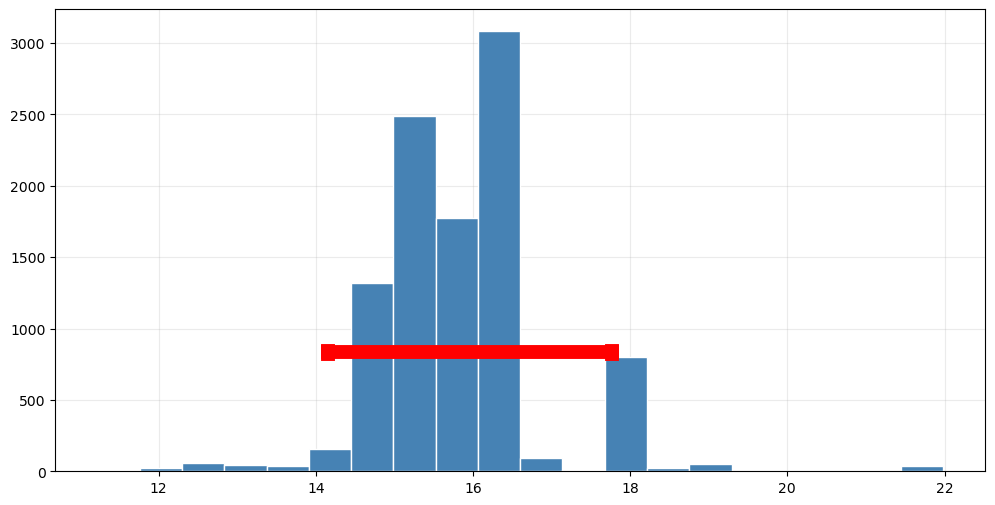

In [12]:
# lets strap on some boots and stuff
def bootstrapped_lowQuartile(sample, num_boots=10000):
    #Your Code Here
    
    
    # Create a list (or array-like object) of bootstrap resample variances
    list_of_stdDevs = []
    for ii in range(num_boots):
        resample_stdDev = np.random.choice(sample, size=len(sample), replace=True)
        boot_stdDev = np.quantile(resample_stdDev, 0.75)
        list_of_stdDevs.append(boot_stdDev)
    
    # Compute the 5 and 95th percentiles of the list of bootstrapped variances
    L = np.percentile(list_of_stdDevs, 3)
    U = np.percentile(list_of_stdDevs, 97)

    # Your 95% confidence interval estimate is given by these percentiles
    CI = np.array([L, U])

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(list_of_stdDevs).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=False)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)

    
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=10)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="red", lw=10)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="red", lw=10)
    
    return CI 
    
        

#dfGalaxyLowerQ = dfGalaxy['x'].loc[(dfGalaxy['x'] < dfGalaxy['x'].quantile(0.25))]
#print(dfGalaxy['x'].quantile(0.25))
#print(dfGalaxyLowerQ)

bootstrapped_lowQuartile(dfGalaxy['x'])


**Part D4 (2 pts)** A $ 80\%$ CI for the **interquartile range (IQR)** of a galaxy's distance from Earth in Mega parsecs.



array([ 4.9125, 11.595 ])

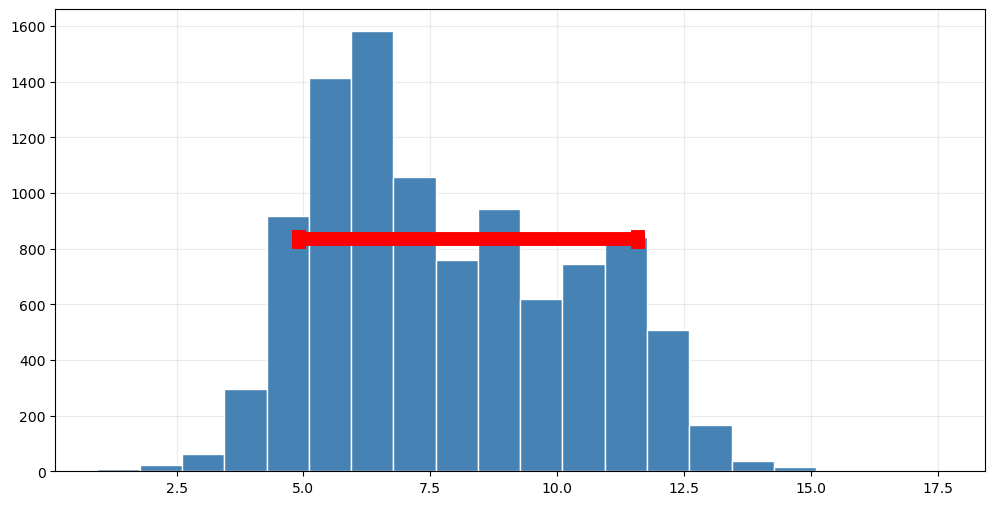

In [13]:
# lets strap on some boots and stuff
def bootstrapped_lowQuartile(sample, num_boots=10000):
    #Your Code Here
    
    
    # Create a list (or array-like object) of bootstrap resample variances
    list_of_stdDevs = []
    for ii in range(num_boots):
        resample_stdDev = np.random.choice(sample, size=len(sample), replace=True)
        boot_stdDev = stats.iqr(resample_stdDev)
        list_of_stdDevs.append(boot_stdDev)
    
    # Compute the 5 and 95th percentiles of the list of bootstrapped variances
    L = np.percentile(list_of_stdDevs, 10)
    U = np.percentile(list_of_stdDevs, 90)

    # Your 95% confidence interval estimate is given by these percentiles
    CI = np.array([L, U])

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(list_of_stdDevs).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=False)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)

    
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=10)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="red", lw=10)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="red", lw=10)
    
    return CI 
    
        
    
    
    
    
    
    




#dfGalaxyLowerQ = dfGalaxy['x'].loc[(dfGalaxy['x'] < dfGalaxy['x'].quantile(0.25))]
#print(dfGalaxy['x'].quantile(0.25))
#print(dfGalaxyLowerQ)

bootstrapped_lowQuartile(dfGalaxy['x'])

[Back to top](#top)

<a id='p3'></a>

## (24 pts) Problem 3: Practice with SLR and Inference


Is calcium in your drinking water good for your health? In England and Wales, an investigation of environmental causes of disease was conducted. The annual mortality rate (percentage of deaths) and the calcium concentration in the drinking water supply were recorded for $61$ large towns. The data in mortality.csv represent the annual mortality rate averaged over the years 1958–1964, and the calcium concentration in parts per million. 

The data has the following variables:

- `Rate`; the annual mortality rate (as a percentage) over the years 1958–1964 of 61 towns in England and Wales.
- `Calc`; the recorded calcium concentration in the drinking water supply for those towns, in parts-per-million


Load the data in Pandas and make a scatter plot with the calcium concentration as the feature on the horizontal axis and mortality rate as the response on the vertical axis. 


<AxesSubplot: xlabel='Calc', ylabel='Rate'>

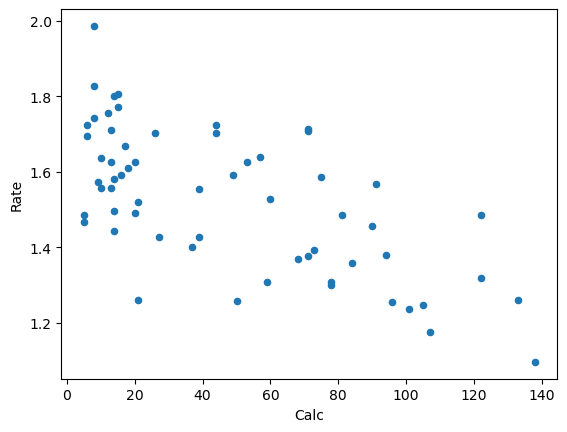

In [14]:
dfHealth = pd.read_csv('mortality.csv')

dfHealth.plot.scatter("Calc", "Rate")


**Part A1) (2 pts)** 
 - Create a linear regression model using the `OLS` method from `statsmodels`.   Note: Remember to include an intercept in your model (see NB 12 for how to do this).
 - Print the resulting `summary` table 
 - Typeset the actual line of best fit (as a print statement or in a markdown cell), using the coefficients from your fit.  (See: `.params`.)

In [15]:
lmHealth=sm.OLS(dfHealth['Rate'], sm.add_constant(dfHealth['Calc'])).fit()
print(lmHealth.summary())

print("Fitted Model: Y = {:.5f} + {:.5f}x".format(lmHealth.params[0], lmHealth.params[1]))

                            OLS Regression Results                            
Dep. Variable:                   Rate   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           1.03e-08
Time:                        20:54:15   Log-Likelihood:                 33.088
No. Observations:                  61   AIC:                            -62.18
Df Residuals:                      59   BIC:                            -57.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6764      0.029     57.217      0.0

**Part A2) (1 pt)**  What are the units of the slope and the intercept in your model from part b1?

**Solution**:



units of the slope: $Rate(s)/Calc$

The intercept is: 1.68

Part A3) 

Several of the outputs are smaller than $0.001$ and thus show up in the table as $0.000$.  To see their exact values, you can use built-in attributes.  

Here are some useful built-in attributes to explore the output.  Note that in each output the first entry is info for the intercept and the 2nd entry is info for the slope.




In [16]:
print("Coefficients: ", lmHealth.params, "\n")
print("Standard errors: ", lmHealth.bse, '\n')
print("p-values: ", lmHealth.pvalues,'\n')
print("Confidence intervals", lmHealth.conf_int(.05),'\n')

Coefficients:  const    1.676356
Calc    -0.003226
dtype: float64 

Standard errors:  const    0.029298
Calc     0.000485
dtype: float64 

p-values:  const    2.165827e-53
Calc     1.033134e-08
dtype: float64 

Confidence intervals               0         1
const  1.617730  1.734981
Calc  -0.004196 -0.002256 




#### Part B: Visualize.

**Part B1 (4 pts)** Make the following 4 plots:


i).  A scatter plot of the data set with overlay the line of best least-squares fit.

ii).  A histogram of *residuals* of best least-squares fit.  

iii).  A Q-Q plot of *residuals*, comparing to a normal distribution.

iv).  A scatter plot where the original x-values are the x-axis and the *residuals* are the y-axis 

Text(0.5, 1.0, 'Data and Fit')

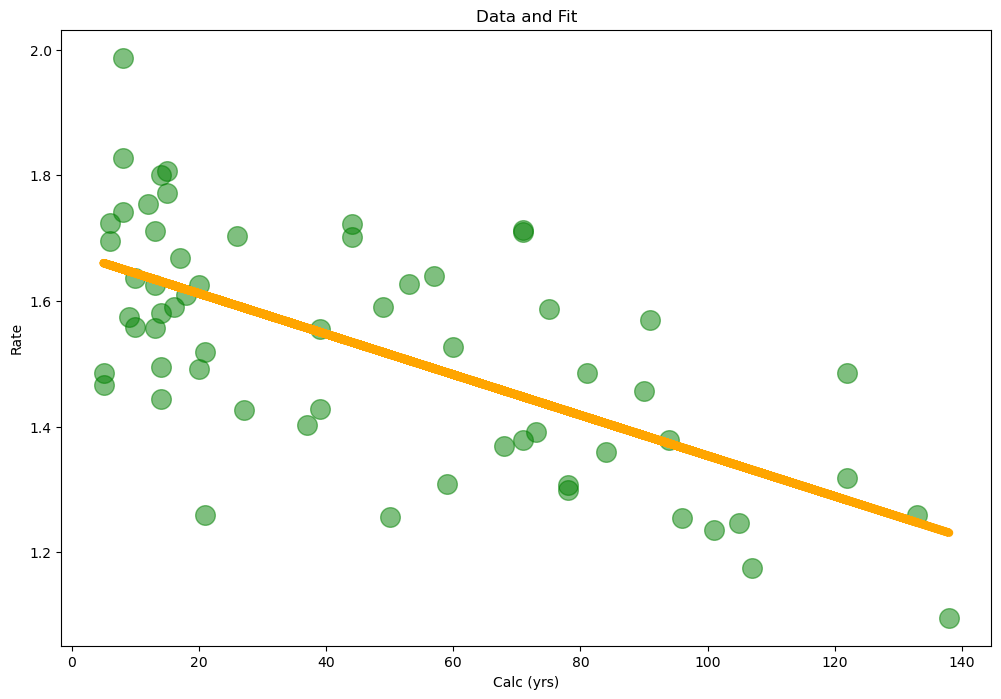

In [17]:
fig, ax= plt.subplots(figsize=(12,8))
ax.scatter(dfHealth['Calc'], dfHealth['Rate'],color="green", alpha=0.5, s=200)
ax.plot( dfHealth['Calc'], lmHealth.fittedvalues,color='orange',lw=6)
ax.set_xlabel('Calc (yrs)')
ax.set_ylabel('Rate')
ax.set_title('Data and Fit')

Text(0.5, 1.0, 'Histogram of Residuals')

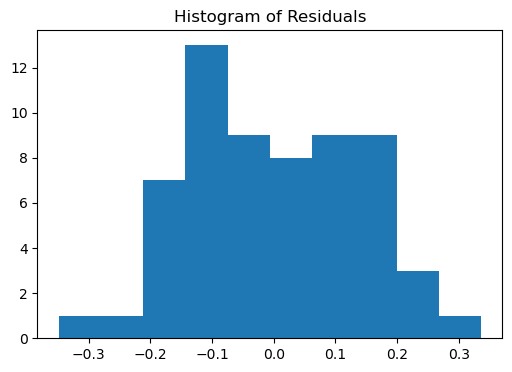

In [18]:
fig, ax= plt.subplots(figsize=(6,4))

ax.hist(lmHealth.resid)
ax.set_title('Histogram of Residuals')

Figure(640x480)


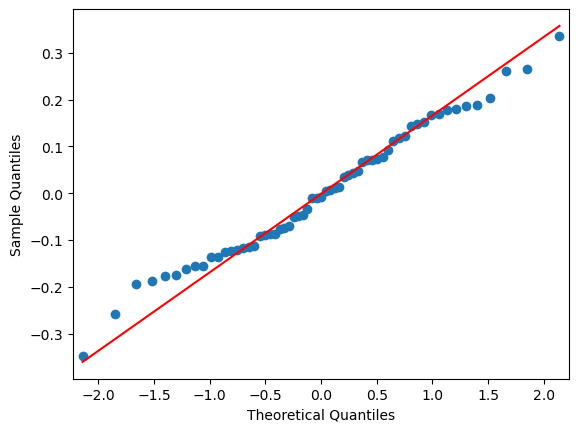

In [19]:
print(sm.qqplot(lmHealth.resid,line='q'))

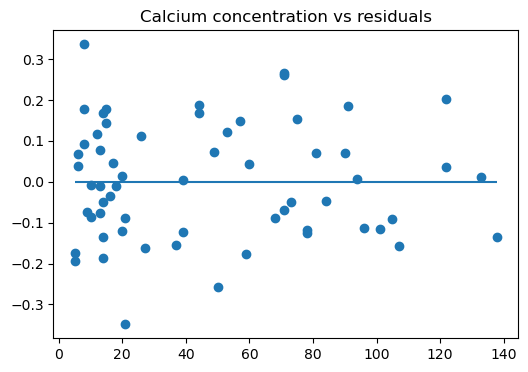

In [20]:
fig, ax= plt.subplots(figsize=(6,4))

ax.scatter(dfHealth["Calc"], lmHealth.resid)
ax.set_title('Calcium concentration vs residuals')
ax.hlines(0, xmin=np.min(dfHealth['Calc']), xmax=np.max(dfHealth['Calc']))

**Part B2 (2 pts)**: What are the 4 major assumptions of the simple linear model?  For each of these assumptions, use your plots in part B1 to decide whether or not the data set meets those assumptions. Explain your reasoning.

**Solution:**


1. Linear function. Yes, in general the data appears to be evenly spread around our line (see graph 1), it looks decently linear (I will say however twords the back it is a little more spread than twords the front...)

2. Errors are independent. Yes, viewing calcium concentration vs resiguals (graph 4), the residuals (and therefore the data aswell) are randomly spaced around the line of best fit, and therefore appear to be independent.

3. Errors normally distributed. No (sort of...), Looking at the histogram of residuals (graph 2), we can see that the residuals are somewhat normally distributed, but there are some weird thigs happening, for example a large spike in data on the left side of this "normal" distribution which makes the data overall appear not very normal. We can see this on the qq plot (graph 3) aswell where the tails of the quartile points start to skew off left going up and right going down away from the line.

4. Errors have equal variances. No, for this I can look at (graph 2) the residuals plot. To me, the graph of the histogram of the residuals appears to be a bit lopsided, and I would say from this it is not normal, and the variances of this error histogram will not be equal.


**Part C: Statistical Inference**: 

In the rest of this problem we will draw specific statistical conclusions from our analysis and linear model.  For each prompt, you should provide both a numerical answer and a full sentence explaining the conclusion.

**Part C1 (2 pts)**: 
Use the output of your model to find how much of the variance in the mortality rates can be explained by the calcium in the drinking water?  Does this seem like a high value or not given the context? Explain your reasoning.


Numerical answer:

$R^2 < 0.5$

Since the $R^2$ value is 0.429 there is a small ammount of variance that can be explained by calcium in the drinking water. I added that it is less than 0.5 to show that it is generally a small value but with this alone I would say there is a bit of corelation between the two.



**Part C2 (2 pts)**: Verify your answer to part C1 by calculating $R^2$ step-by step in Python.  i.e. complete the following code and output the $R^2$ value.  Verify that it matches the output from the model summary table.  



In [21]:

# yhat is the expected / best guess value. (From our line best fit.)
# yhat = 1.6764 + -0.0032x
def yhat(x):
    return 1.6767 + -0.0032*x






# sum squared errors
# sum: (yi - yhati)**2

SSE = np.sum((dfHealth["Rate"] - yhat(dfHealth["Calc"]))**2)
print("SSE is: ", SSE)



      
# sum of squares due to regression    
# sum: ((yhati - ymean)**2)
SSR = np.sum((yhat(dfHealth["Calc"]) - dfHealth["Rate"].mean())**2)
print("SSR is: ", SSR)
    


    
# total sum of squares  
# sum: ((yi - ymean)**2)
SST = np.sum((dfHealth["Rate"] - dfHealth["Rate"].mean())**2)
print("SST is: ", SST)





# R2 = (SST - SSE) / SST
# finally we get to do the R^2

R2 = (SST - SSE ) / SST

print("R-Squared is: ", R2)

    
    

SSE is:  1.2071990100000005
SSR is:  0.8917381247540987
SST is:  2.113173672131148
R-Squared is:  0.4287270251751086


**Part C3)**:  A skeptic insists that "there's no way water quality is actually affecting death rates."  You decide to test whether or not your linear model demonstrates otherwise.  

**C3i) (1 pt)**  To test this, you start with the null hypothesis that water quality is NOT actually affecting death rates.  Write the null hypothesis and the alternative hypothesis mathematically in terms of our model parameter(s):




$H_0$: Confidence interval does not contain zero

$H_A$: Confidence interval does contain zero


**C3ii)(1 pt)**  Using the summary table output of the model, what is the $95\%$ confidence interval for the slope $\beta$?



[-0.004, -0.002]

**C3iii)(1 pts)** Using the confidence interval from C3ii, can you make a conclusion about your hypothesis test?  If so, what do you conclude?  If not, what additional information would you need?


The CI does not contain zero! So we can reject the null and accept the alternitive.

**Part C4)**:  The government decides they believe your analysis in part D2 that Calcium levels are actually affecting death rates,  but augmenting the drinking supply with Calcium is costly.  They insist that they don't actually want to take any actions unless you can demonstrate that the effect size of `Calcium` concentration on mortality `Rate` is *large enough*.  

In particular, they will implement a calcification campaign if and only one part-per-million of `Calcium` decreases mortality rate by more than 0.0025 percentage at the $1\%$ significance level.
i.e. $\frac{\text{change in mortality %}}{\text{change in ppm of Calcium}}< -0.0025$

We can reframe this as a new hypothesis test, where

$H_0: \beta = -0.0025$

and

$H_A:  \beta < -0.0025$


**Part C4i (1 pt)**.  Since this is a one-sided test, our rejection region will only be in the left tail.  Find the cutoff for the rejection region  (i.e. find  $-t_{\alpha, n-2})$.  You can use built-in Python functions to calculate.



In [49]:
stats.t.ppf(0.01, len(dfHealth["Calc"])-2)

-2.3912288325162177

**Part C4ii (1 pt)**  The formula for the test statistic for this test assuming the null hypothesis is true is given by:

test_statistic $=\frac{b-\beta}{SE(b)}=\frac{b-(-.0025)}{SE(b)}$


Use the summary output from the model to find the terms needed to calculate this test statistic and then calculate.


In [53]:

b = -0.0032

beta = -0.0025

# SEb = 0.029 # not sure if this is correct... I think it should be 0.000 !!!!!!!!!!
SEb = lmHealth.bse[1]



testStatistic = (b - beta) / SEb

print("Test stat is: ", testStatistic)

Test stat is:  -1.4441234753976377


**Part C4iii (1 pt)**  Is your test statistic in your rejection region or not?  What do you recommend to the government based on the results of this test?

It is not in our rejection rejion! So we will fail to reject our H0 and accept our HA

**Part D** Prediction and Confidence Bands

**Part D1) (2 pts)**  Create one plot with the original data, the model, and the $95\%$ predication and confidence bands for the model (see nb12 for how to do this).


                            OLS Regression Results                            
Dep. Variable:                   Rate   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           1.03e-08
Time:                        22:40:44   Log-Likelihood:                 33.088
No. Observations:                  61   AIC:                            -62.18
Df Residuals:                      59   BIC:                            -57.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6764      0.029     57.217      0.0

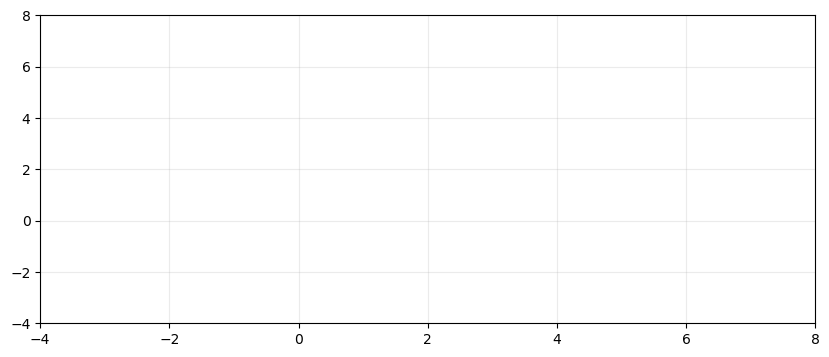

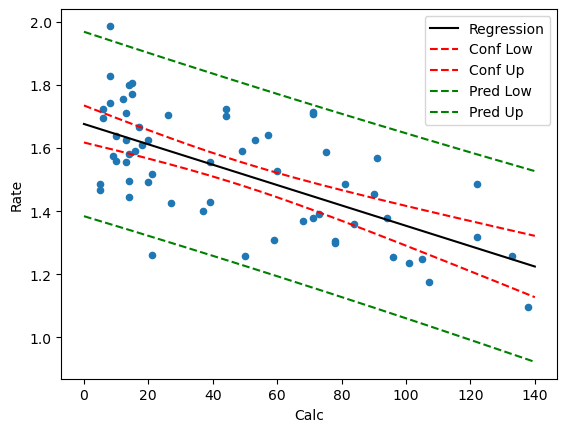

In [57]:
#make a model

# Inspect the results
xgrd=np.linspace(0,140,1000) #grid for plotting
#find confidence and predictive intervals all over our plot:
predictions = lmHealth.get_prediction(sm.add_constant(xgrd))
predmat=predictions.summary_frame(alpha=0.05)

#plot it all
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlim([-4,8])
ax.set_ylim([-4,8])
dfHealth.plot.scatter("Calc", "Rate")

#Plot each column
plt.plot(xgrd,(predmat.mean_ci_lower+predmat.mean_ci_upper)/2, color='black', label='Regression')
plt.plot(xgrd,predmat.mean_ci_lower, 'r--', label='Conf Low')
plt.plot(xgrd,predmat.mean_ci_upper, 'r--', label='Conf Up')
plt.plot(xgrd,predmat.obs_ci_lower, 'g--', label='Pred Low')
plt.plot(xgrd,predmat.obs_ci_upper, 'g--', label='Pred Up')
plt.legend()

print(lmHealth2.summary())


**Part D2) (1 pt)** Explain the difference between what the $95\%$ prediction band is measuring vs the $95\%$ confidence band.


The predictions band is the places where points will actually end up. And the confidence band is a range of how accurate our results are around our prediction line.

conf is the true mean 95%

Prediction band is adding a new point where will it fall? 95% chance in there!



**Part D3)**:  The town of Manchester and their football clubs are loathsome.  While the town wasn't originally tested, we are told that the calcium concentration in their drinking water is exactly 100 ppm.

**Part D3i (1 pt)** What is the 95% **prediction** interval for the mortality rate in Manchester?  In other words, given our linear model, what is the interval that we think should contain the actual mortality rate for Manchester?


**Part D3ii (1 pt)**  
What is the 95% **confidence** interval for the mortality rate in Manchester?  In other words, what is the interval that we think should contain the **mean** mortality rate for any town with a Calcium concentration of 100 ppm?


In [ ]:
D3i

[1.1, 1.7]ish






D3ii

[1.3, 1.5]ish

**Answers To Selected Problems**

Coming Soon!

## [Back to top](#top)
